In [35]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
df=pd.read_excel("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/marketing_campaign.xlsx")

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [38]:
#Miro % de NANS
for col in df.columns:
    suma_nans=pd.isnull(df[col]).values.ravel().sum()
    print(col,"=",(suma_nans/df.shape[0])*100,"%")

ID = 0.0 %
Year_Birth = 0.0 %
Education = 0.0 %
Marital_Status = 0.0 %
Income = 1.0714285714285714 %
Kidhome = 0.0 %
Teenhome = 0.0 %
Dt_Customer = 0.0 %
Recency = 0.0 %
MntWines = 0.0 %
MntFruits = 0.0 %
MntMeatProducts = 0.0 %
MntFishProducts = 0.0 %
MntSweetProducts = 0.0 %
MntGoldProds = 0.0 %
NumDealsPurchases = 0.0 %
NumWebPurchases = 0.0 %
NumCatalogPurchases = 0.0 %
NumStorePurchases = 0.0 %
NumWebVisitsMonth = 0.0 %
AcceptedCmp3 = 0.0 %
AcceptedCmp4 = 0.0 %
AcceptedCmp5 = 0.0 %
AcceptedCmp1 = 0.0 %
AcceptedCmp2 = 0.0 %
Complain = 0.0 %
Z_CostContact = 0.0 %
Z_Revenue = 0.0 %
Response = 0.0 %


In [39]:
#Elimino filas cuyo("race","diag_1","diag_2","diag_3")=nan
df= df.dropna(axis=0, subset=["Income"])

In [40]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [41]:
#cols_cat=['Education','Marital_Status']
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
df['Education'] = class_labelEncoding.fit_transform(df['Education'].values)
df['Marital_Status'] = class_labelEncoding.fit_transform(df['Marital_Status'].values)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [42]:
df=df.drop("Dt_Customer",axis=1)

In [43]:
df.iloc[:,-1]

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    1
Name: Response, Length: 2216, dtype: int64

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Feature ranking:
1. feature 7 (0.076542)
2. feature 0 (0.064679)
3. feature 21 (0.055741)
4. feature 19 (0.055494)
5. feature 10 (0.054613)
6. feature 8 (0.048726)
7. feature 22 (0.047966)
8. feature 18 (0.047014)
9. feature 16 (0.045660)
10. feature 3 (0.042637)
11. feature 13 (0.041867)
12. feature 4 (0.041838)
13. feature 17 (0.041436)
14. feature 12 (0.040986)
15. feature 9 (0.039626)
16. feature 1 (0.038874)
17. feature 15 (0.038413)
18. feature 11 (0.038028)
19. feature 14 (0.036155)
20. feature 2 (0.032714)
21. feature 6 (0.023558)
22. feature 20 (0.017951)
23. feature 5 (0.015027)
24. feature 23 (0.012217)
25. feature 24 (0.002236)
26. feature 25 (0.000000)
27. feature 26 (0.000000)


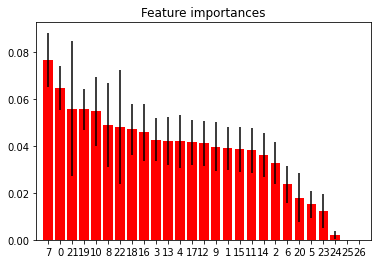

In [44]:
#Feature Selection
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1:])

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [45]:
df = df.drop(df.columns[[0,6,20,5,23,24,25,26]],axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp5,AcceptedCmp1,Response
0,1957,2,4,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,1
1,1954,2,4,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0
2,1965,2,5,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0
3,1984,2,5,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0
4,1981,4,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0


### Hold out

In [46]:
#np.array(df2.iloc[:,-1:]).reshape(2240,)

In [47]:
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1:])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
clf = RandomForestClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test,yhat)

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8796992481203008

### K-Fold

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [51]:
y=np.array(df.iloc[:,-1:]).reshape(2216,)

In [52]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = RandomForestClassifier(n_estimators=250)
clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.87387387 0.86936937 0.9009009  0.89189189 0.87837838 0.89189189
 0.84615385 0.90045249 0.88687783 0.87782805]
**************************************************
Accuracy:  0.8817618523500876


In [53]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(n_estimators=250)
    clf = clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      0.974     0.894     0.932      2051
           1      0.348     0.703     0.466       165

    accuracy                          0.880      2216
   macro avg      0.661     0.799     0.699      2216
weighted avg      0.927     0.880     0.898      2216



**La clase 1 no esta muy bien clasificada, el 70%, la clase 0 esta bien clasificada en un 89%**

In [55]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### GRID SEARCH

***Encuentra los mejores parametros para el random forest***

In [31]:
params={'n_estimators': [100,200,300],
        'criterion':['gini','entropy'],
        #'max_depth': [3,4,5],# Maxima pofundidad del arbol
        'max_features': [2, 3], # numero de features a considerar en cada split
        #'max_leaf_nodes': [8], # maximo de nodos del arbol
        'min_impurity_decrease' : [0.02,0.3], # un nuevo nodo se hará si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [2,5] # The minimum number of samples required to split an internal node
        }

# creamos la GridSeacrh
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer,recall_score

scorers = {"f1_macro","accuracy","recall_macro"}
clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, # model to train
                           param_grid = params, # param_grid
                           scoring=scorers,
                           cv = 5,
                           refit="f1_macro",
                           n_jobs=-1)

model_result = grid_solver.fit(xtrain,ytrain)
print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.best_score_)
print(model_result.best_params_)

0.5
0.4593803355150882
0.8497292453947453
0.4593803355150882
{'criterion': 'gini', 'max_features': 2, 'min_impurity_decrease': 0.02, 'min_samples_split': 2, 'n_estimators': 100}


In [32]:
clf = RandomForestClassifier(criterion= 'gini',
 max_features= 2,
 min_impurity_decrease= 0.02,
 min_samples_split= 2,
 n_estimators= 100)

clf = clf.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

[0.84684685 0.84684685 0.84684685 0.85135135 0.85135135 0.85135135
 0.85067873 0.85067873 0.85067873 0.85067873]
**************************************************
Accuracy:  0.8497309526721292


In [33]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestClassifier(criterion= 'gini',
     max_features= 2,
     max_leaf_nodes= 8,
     min_impurity_decrease= 0.02,
     min_samples_split= 2,
     n_estimators= 100)
    
    clf = clf.fit(X_train, y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

In [34]:
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      1.000     0.850     0.919      2216
           1      0.000     0.000     0.000         0

    accuracy                          0.850      2216
   macro avg      0.500     0.425     0.459      2216
weighted avg      1.000     0.850     0.919      2216



/Users/rociocuestapedraz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Hay que ajustar mejor los parametros**

### Leave one out

In [97]:
import ray
from sklearn.model_selection import LeaveOneOut

In [98]:
ray.shutdown()
ray.init()
@ray.remote
def leaveOne(X,y,train_index,test_index):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = RandomForestClassifier()
  clf.fit(X_train, y_train)
  yhat1 = clf.predict(X_test)
  # yhat.append(yhat1)
  return yhat1
loo = LeaveOneOut()

listaResultado = []
for train_index, test_index in loo.split(X): 
  listaResultado.append(leaveOne.remote(X,y,train_index,test_index))
res = ray.get(listaResultado)
print("fin")
ray.shutdown()

2020-08-18 12:53:44,596	WARNING worker.py:682 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-08-18 12:53:44,618	INFO resource_spec.py:212 -- Starting Ray with 1.95 GiB memory available for workers and up to 0.98 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-08-18 12:53:44,913	WARNING services.py:1080 -- Failed to start the dashboard. The dashboard requires Python 3 as well as 'pip install aiohttp psutil setproctitle grpcio'.


fin


In [100]:
res

[array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),
 array([0]),

In [101]:
print(classification_report(res, y,digits=3))

              precision    recall  f1-score   support

           0      0.971     0.896     0.932      2042
           1      0.360     0.690     0.473       174

    accuracy                          0.880      2216
   macro avg      0.666     0.793     0.703      2216
weighted avg      0.923     0.880     0.896      2216



### KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
clf = KNeighborsClassifier()
scores_acc = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
scores_f1=cross_val_score(clf, X, y, cv=10, scoring = make_scorer(f1_score))

#print(scores)
#print("*****"*10)
print("Accuracy_score: ", scores_acc.mean())
print("F1_score: ",scores_f1.mean())

Accuracy_score:  0.842966042966043
F1_score:  0.22818770205964217


In [69]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### Grid para KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
paramsNeighbors = {'n_neighbors':[2,3,4,5,6,7,8,9,10],
  'weights': ['uniform', 'distance'],
  'algorithm':['ball_tree', 'kd_tree', 'brute']
}
clfKnn=KNeighborsClassifier()
scorers = {"f1_macro","accuracy","recall_macro"}
grid_solver2 = GridSearchCV(estimator = clf, # model to train
                   param_grid = paramsNeighbors, # param_grid
                   scoring = scorers,
                   refit="f1_macro",
                   cv = 5,
                   n_jobs=-1)
model_result2 = grid_solver2.fit(X_train,y_train)
print("Mejores parámetros")
model_result2.best_params_

Mejores parámetros


{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}

### Voting

In [75]:
from sklearn import neighbors
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [76]:
clf0 = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 3, weights= 'distance')
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GaussianNB()

In [90]:
clf = VotingClassifier(estimators=[('knn', clf0),('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard', weights=[2, 1,1,1], n_jobs=-1)

In [91]:
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(f1_score, average="macro"))   #cross_val_score: te da el score (clasificador, dataset X e y, cv =numero de k,scoring=)
scores.mean()

0.6471131184871002